# Apple Stock Price Prediction

### Objective:
#### forecasts Apple stock prices for the next 30 days using historical stock data from 2012 to 2019. The model will help investors, traders, and financial analysts make informed decisions based on stock trends and potential market movements.

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

### Data Preprocessing

In [99]:
## dataset
df=pd.read_csv('P625 DATASET.csv',parse_dates=['Date'],index_col='Date')

In [100]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [101]:
## shape
df.shape

(2011, 6)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2011 entries, 2012-01-03 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2011 non-null   float64
 1   High       2011 non-null   float64
 2   Low        2011 non-null   float64
 3   Close      2011 non-null   float64
 4   Adj Close  2011 non-null   float64
 5   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.0 KB


In [103]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [104]:
## missing values
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [105]:
## duplicated values
df.duplicated().sum()

np.int64(0)

<Axes: >

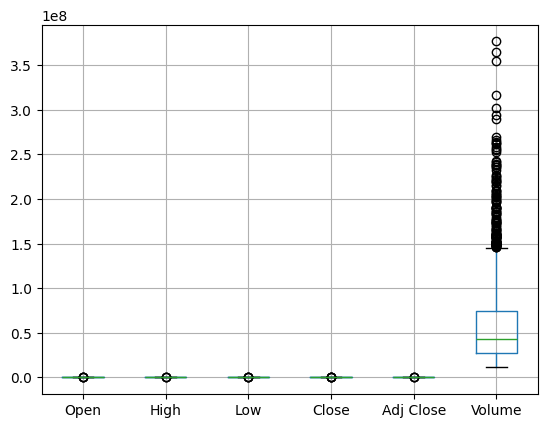

In [106]:
## outliers
df.boxplot()

### Exploratory Data Analysis (EDA)

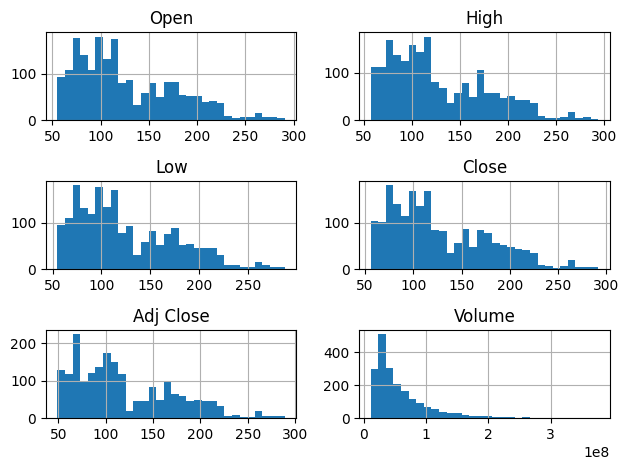

In [107]:
# Plot histogram
df.hist(bins=30)
plt.tight_layout()
plt.show()

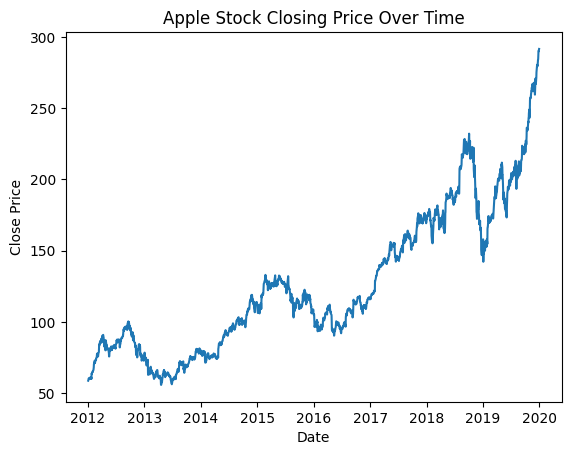

In [108]:
plt.plot(df.index, df['Close'])
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Apple Stock Closing Price Over Time")
plt.show()

In [109]:
decomposition = seasonal_decompose(df['Close'], model='additive', period=252)

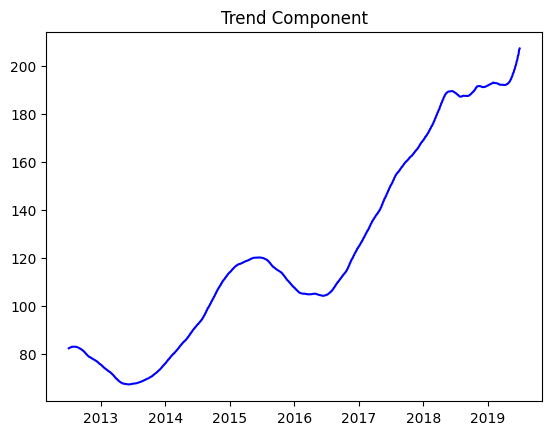

In [110]:
## trend
plt.plot(decomposition.trend, color='blue')
plt.title("Trend Component")
plt.show()

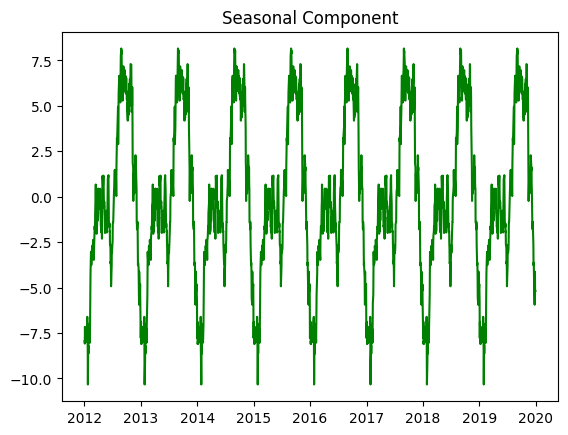

In [111]:
## seasonality
plt.plot(decomposition.seasonal, color='green')
plt.title("Seasonal Component")
plt.show()

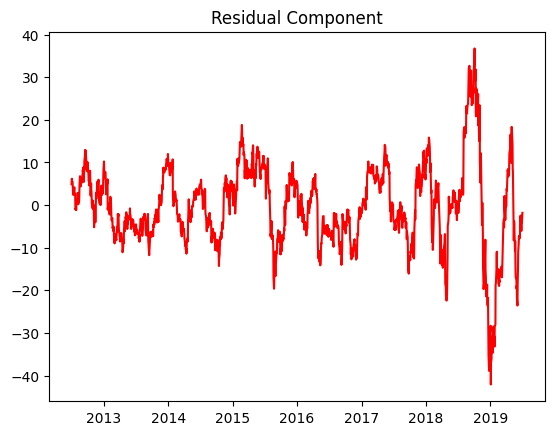

In [112]:
## residual
plt.plot(decomposition.resid, color='red')
plt.title("Residual Component")
plt.show()

### Feature Engineering

In [113]:
## moving averages
df['MA_7'] = df['Close'].rolling(7).mean()
df['MA_14'] = df['Close'].rolling(14).mean()
df['MA_30'] = df['Close'].rolling(30).mean()

In [114]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,MA_7,MA_14,MA_30
Date,,,,,,,,,
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000,279.802852,273.877138,268.701334
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700,281.105708,275.486424,269.436999
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300,282.541425,277.224282,270.368667
2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500,283.882852,278.587853,271.212999
2019-12-30,289.459991,292.690002,285.220001,291.519989,289.522614,36028600,285.565709,280.344995,272.175665


In [115]:
## volatality
df['Volatility_7'] = df['Close'].rolling(7).std()
df['Volatility_14'] = df['Close'].rolling(14).std()

In [116]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,MA_7,MA_14,MA_30,Volatility_7,Volatility_14
Date,,,,,,,,,,,
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000,279.802852,273.877138,268.701334,2.576166,6.820951
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700,281.105708,275.486424,269.436999,2.091410,6.380702
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300,282.541425,277.224282,270.368667,3.824892,6.776053
2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500,283.882852,278.587853,271.212999,4.533700,7.267290
2019-12-30,289.459991,292.690002,285.220001,291.519989,289.522614,36028600,285.565709,280.344995,272.175665,4.910280,7.202838


In [117]:
## Lag Features
df['Lag_1'] = df['Close'].shift(1)
df['Lag_7'] = df['Close'].shift(7)
df['Lag_14'] = df['Close'].shift(14)

In [118]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,MA_7,MA_14,MA_30,Volatility_7,Volatility_14,Lag_1,Lag_7,Lag_14
Date,,,,,,,,,,,,,,
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000,279.802852,273.877138,268.701334,2.576166,6.820951,279.440002,271.459991,259.450012
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700,281.105708,275.486424,269.436999,2.091410,6.380702,284.000000,275.149994,261.739990
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300,282.541425,277.224282,270.368667,3.824892,6.776053,284.269989,279.859985,265.579987
2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500,283.882852,278.587853,271.212999,4.533700,7.267290,289.910004,280.410004,270.709991
2019-12-30,289.459991,292.690002,285.220001,291.519989,289.522614,36028600,285.565709,280.344995,272.175665,4.910280,7.202838,289.799988,279.739990,266.920013


# Module selection And Training

Spilt data training testing data

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
df.dropna(inplace=True)
X = df.drop('Close', axis=1)
y = df['Close']


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

Statistical Models: ARIMA, SARIMA for trend-based forecasting.

In [131]:
import warnings
warnings.simplefilter('ignore')
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.statespace.sarimax import SARIMAX

Initialize and fit the model on training data

# Arima

In [137]:
model=ARIMA(train_data['Close'],order=(1,1,1))

In [138]:
arima_result=model.fit()

In [139]:
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1585
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3047.505
Date:                Sat, 03 Jan 2026   AIC                           6101.010
Time:                        02:56:49   BIC                           6117.113
Sample:                             0   HQIC                          6106.993
                               - 1585                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2876      0.401     -0.717      0.473      -1.073       0.498
ma.L1          0.3338      0.397      0.841      0.400      -0.444       1.112
sigma2         2.7456      0.058     47.564      0.000       2.632       2.859
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               925.88
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               1.80   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Generate forecasts for the test set period

In [140]:
arima_forecast_results = arima_result.get_forecast(steps=len(test_data))

Get the predicted means and confidence intervals

In [141]:
pred_mean = arima_forecast_results.predicted_mean
pred_ci = arima_forecast_results.conf_int()

Ensure the forecast index matches the test data index for comparison


In [142]:
pred_mean.index = test_data.index

# Sarima

In [145]:
model = SARIMAX(train_data['Close'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12))

In [146]:
Sarima_results = model.fit()


In [147]:
Sarima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 1585
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3054.031
Date:                            Sat, 03 Jan 2026   AIC                           6118.063
Time:                                    02:58:16   BIC                           6144.864
Sample:                                         0   HQIC                          6128.024
                                           - 1585                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2760      0.453     -0.609      0.543      -1.165       0.613
ma.L1          0.3185      0.449      0.709      0.479      -0.562       1.199
ar.S.L12      -0.0341      0.027     -1.287      0.198      -0.086       0.018
ma.S.L12      -0.9921      0.016    -60.232      0.000      -1.024      -0.960
sigma2         2.7634      0.066     42.000      0.000       2.634       2.892
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               873.87
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.79   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Generate forecasts for the test set period

In [148]:
forecast_steps = len(test_data)
sarima_forecast_results = Sarima_results.get_forecast(steps=forecast_steps)

In [149]:
# Get the predicted means and confidence intervals
pred_mean = sarima_forecast_results.predicted_mean
pred_ci = sarima_forecast_results.conf_int()

In [150]:
# Ensure the forecast index matches the test data index for comparison
pred_mean.index = test_data.index

Train Machine Learning module (Random Forest,Xgboost)

In [151]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Random forest

Define Random forest module

In [152]:
rf_model = RandomForestRegressor(random_state=42)


fitting module training data

In [153]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Predict to the module testing data








In [154]:
rf_pred = rf_model.predict(X_test)


# Xgboost

Defining Xgboost module

In [155]:
xgb_model = XGBRegressor(random_state=42)




module fitting training data

In [156]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Module prediction testing data

In [157]:
xgb_pred = xgb_model.predict(X_test)

Compare models using evaluation metrics (RMSE, MAE)

Evaluate the model using Mean Squared Error (MSE) and Mean absolute Error

In [158]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [162]:
# Calculate metrics for arima
arima_rmse = np.sqrt(mean_squared_error(test_data['Close'], pred_mean))
arima_mae = mean_absolute_error(test_data['Close'], pred_mean)
print(f"Arima RMSE: {arima_rmse}")
print(f"Arima MAE: {arima_mae}")

# Calculate metrics for Sarima
Sarima_rmse = np.sqrt(mean_squared_error(test_data['Close'], pred_mean))
Sarima_mae = mean_absolute_error(test_data['Close'], pred_mean)
print(f"srima RMSE: {Sarima_rmse}")
print(f"srima MAE: {Sarima_mae}")

Arima RMSE: 26.59295800861344
Arima MAE: 21.347549868837824
srima RMSE: 26.59295800861344
srima MAE: 21.347549868837824


In [160]:
# Calculate metrics for Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_mae = mean_absolute_error(y_test, rf_pred)
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest MAE: {rf_mae}")

# Calculate metrics for XGBoost
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_mae = mean_absolute_error(y_test, xgb_pred)
print(f"XGBoost RMSE: {xgb_rmse}")
print(f"XGBoost MAE: {xgb_mae}")

Random Forest RMSE: 0.7958291521357963
Random Forest MAE: 0.5367573569269524
XGBoost RMSE: 1.2202535716598866
XGBoost MAE: 0.7886965452312017


# HyperParameter & evaluation


In [164]:
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit

 Define hyperparameter grid search for Random Forest

In [165]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
}


Use TimeSeriesSplit for cross-validation

In [166]:
tscv = TimeSeriesSplit(n_splits=5)

Instantiate the GridSearchCV object

In [167]:
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=param_grid_rf,
                              scoring='neg_mean_squared_error',
                              cv=tscv, verbose=2, n_jobs=-1)

Fit of grid search

In [168]:
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

Best model

In [169]:

best_rf_model = grid_search_rf.best_estimator_


 Final prediction

In [170]:
# Final Evaluation
final_pred = best_rf_model.predict(X_test)



Evaluation matrices and graph

Tuned model with performance evaluation

In [171]:
best_rf_model_rmse= np.sqrt(mean_squared_error(y_test,final_pred))
best_rf_model_mae = mean_absolute_error(y_test, final_pred)
print(f"Random Forest RMSE: {best_rf_model_rmse}")
print(f"Random Forest MAE: {best_rf_model_mae}")

Random Forest RMSE: 0.8053937108965086
Random Forest MAE: 0.5426289707640534


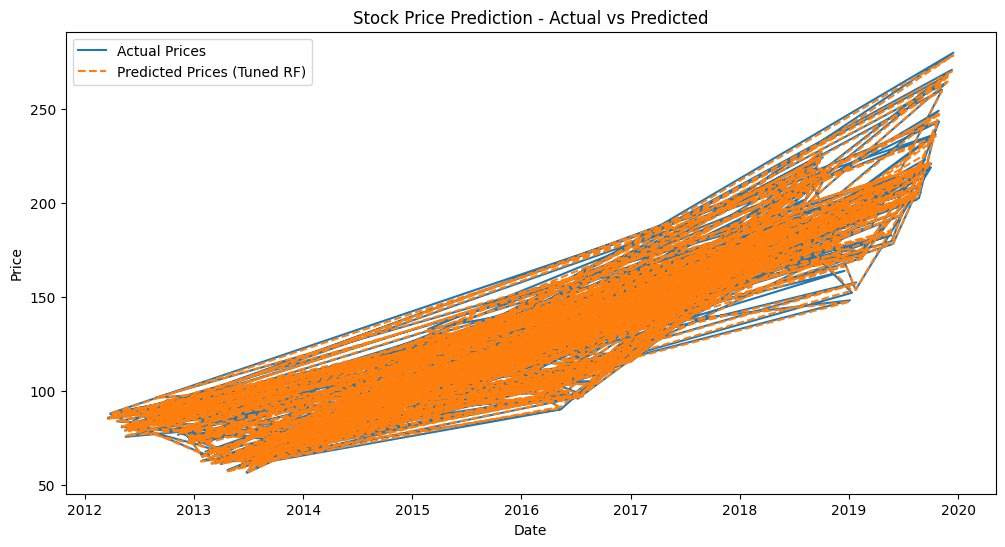

In [172]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, final_pred, label='Predicted Prices (Tuned RF)', linestyle='--')
plt.title('Stock Price Prediction - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()